In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import glob
from sklearn.utils import shuffle
from skimage.transform import resize

In [57]:
batman=glob.glob('batman/*.jpg')
joker=glob.glob('joker/*.jpg')
catwomen=glob.glob('catwomen/*.jpg')

In [58]:
image=[]
label=[]

for i in batman:
    img=plt.imread(i)
    image.append(img)
    label.append(0)
    
for i in joker:
    img=plt.imread(i)
    image.append(img)
    label.append(1)
    
for i in catwomen:
    img=plt.imread(i)
    image.append(img)
    label.append(2)

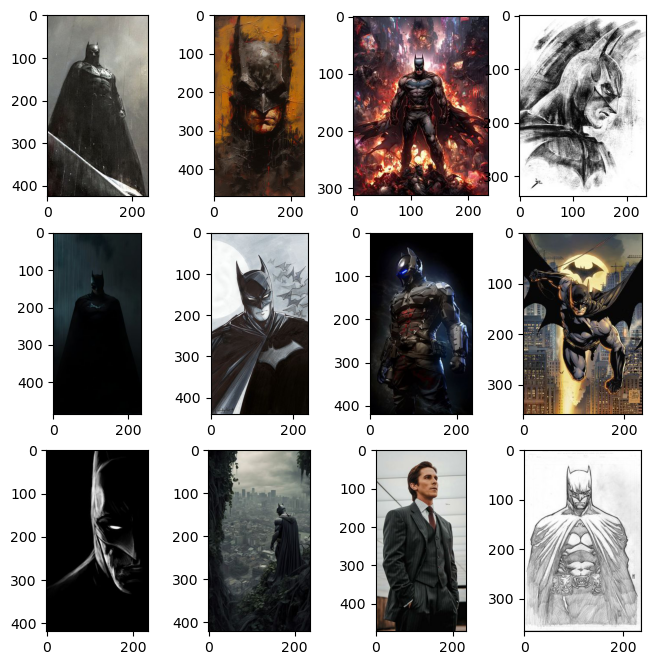

In [10]:
plt.figure(figsize=(8,8))
for i in range(12):
    plt.subplot(3,4,i+1)
    plt.imshow(image[i])

In [150]:
label_names={0:'batman',1:'joker',2:'catwomen'}

In [151]:
image,label=shuffle(image,label)

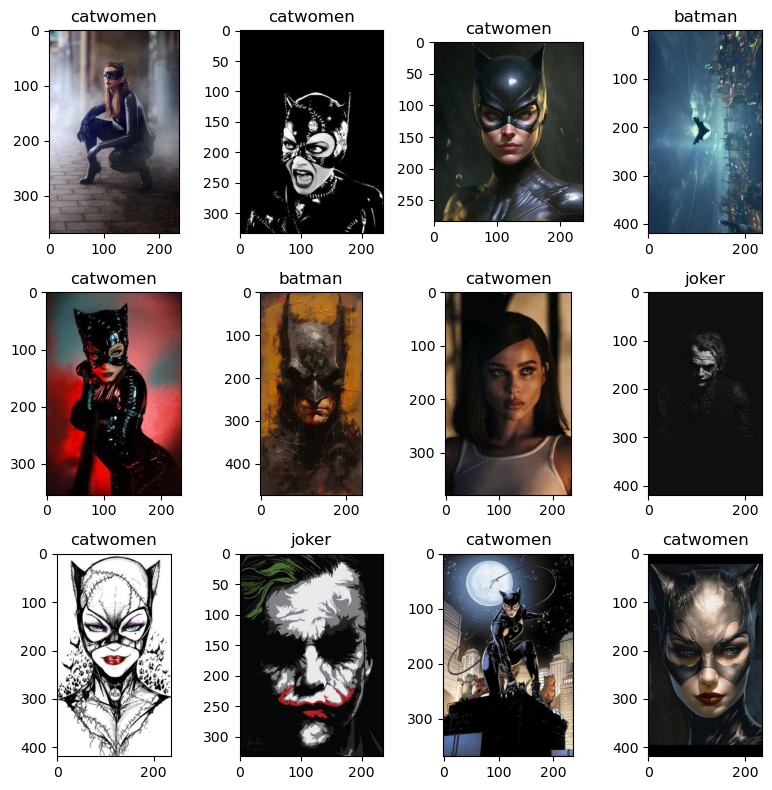

In [152]:
plt.figure(figsize=(8,8))
for i in range(12):
    plt.subplot(3,4,i+1)
    plt.imshow(image[i])
    plt.title(label_names[label[i]])
plt.tight_layout()

In [74]:
for i in range(7):
    print(image[i].shape)

(330, 236, 3)
(417, 236, 3)
(445, 236, 3)
(418, 236, 3)
(365, 236, 3)
(426, 236, 3)
(472, 236, 3)


In [75]:
x=[]
for i in image:
    x.append(resize(i,(300,300,3)))

In [76]:
x=np.array(x)
y=np.array(label)

In [83]:
d1,d2,d3,d4=x.shape

In [84]:
x=x.reshape((d1,d2*d3*d4))

In [85]:
from sklearn.model_selection import train_test_split

In [86]:
X_train, X_test, y_train, y_test =train_test_split(x,y,train_size=.2)

In [142]:
from sklearn.naive_bayes import GaussianNB

In [143]:
model=GaussianNB()

In [144]:
model.fit(X_train,y_train)

GaussianNB()

In [145]:
model.score(X_train,y_train)

1.0

In [146]:
y_pred=model.predict(X_test)

In [147]:
from sklearn.metrics import accuracy_score , confusion_matrix , classification_report

<Axes: >

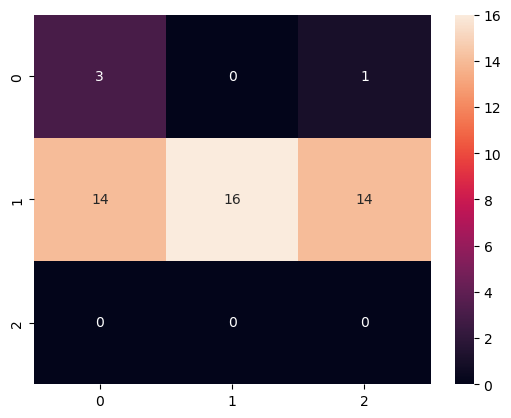

In [148]:
sns.heatmap(confusion_matrix(y_pred,y_test),annot=True)

In [149]:
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.75      0.18      0.29        17
           1       0.36      1.00      0.53        16
           2       0.00      0.00      0.00        15

    accuracy                           0.40        48
   macro avg       0.37      0.39      0.27        48
weighted avg       0.39      0.40      0.28        48

0.3958333333333333


C:\Users\user\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\user\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\user\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Email:shamilmskeeri@gmail.com